In [48]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

In [58]:
filepaths = ['Annotations/smoking.json', 'Annotations/immigration.json', 'Annotations/samesex.json']
lst = []
for filepath in filepaths:
    with open(filepath) as data_file:    
        annotations = json.load(data_file)  

    for k_i, key in enumerate(annotations.keys()):
        caseid = key.split('-')[-1]
        data = annotations[key]
        source = data['source']
        year = str(data['year'])
        month = str(data['month'])
        day = str(data['day'])
        title = str(data['title']).encode('ascii', 'ignore')
        byline = str(data['byline']).encode('ascii', 'ignore')
        section = str(data['section']).encode('ascii', 'ignore')
        irrelevant = data['irrelevant']
        f_annotations = data['annotations']['framing']
        t_annotations = data['annotations']['tone']
        i_annotations = data['annotations']['irrelevant']
        n_frames = 0
        for i, key in enumerate(f_annotations.keys()):
            n_frames += len(f_annotations[key])
        if len(f_annotations)!= 0:
            n_frames = n_frames/len(f_annotations)
        else:
            n_frames = 0
        length = data['length']
        page = str(data['page'])
        lst.append([filepath.split('/')[1][0:-5], caseid, data, source, year, month, day, title, byline, section, irrelevant, f_annotations, t_annotations, i_annotations, n_frames, length, page])
    
df = pd.DataFrame(lst, columns=['Issue', 'Case ID', 'Data', 'Source', 'Year', 'Month', 'Day', 'Title', 'Byline', 'Section', 'Irrelevant', 'Frame annotations', 'Tone annotations', 'Irr annotations', 'N frames', 'Length', 'Page'])
df

,Issue,Case ID,Data,Source,Year,Month,Day,Title,Byline,Section,Irrelevant,Frame annotations,Tone annotations,Irr annotations,N frames,Length,Page
0,smoking,3982,"{'byline': 'By ELIZABETH OLSON', 'title': 'Big...",new york times,2001,1,15,b'Big Tobacco Said to Fight Swiss Smoking Laws',b'By ELIZABETH OLSON',b'section a',False,{},{},{},0.0,761,8
1,smoking,20714,"{'byline': 'Carol D. Leonnig, Washington Post ...",washington post,2005,6,8,b'Tobacco Escapes Huge Penalty; U.S. Seeks $10...,"b'Carol D. Leonnig, Washington Post Staff Writer'",b'a section',False,"{'annotator0_99.0_r': [{'start': 11, 'code': 1...","{'annotator5_106.2_rt': [{'start': 11, 'code':...","{'annotator0_99.0_r': False, 'annotator10_97.0...",8.5,1089,a01
2,smoking,26515,"{'byline': 'Tina Dupuy', 'title': 'Shrinking s...","herald-sun (durham, n.c.)",2012,7,14,"b""Shrinking sodas isn't a bad start""",b'Tina Dupuy',b'local news',False,{},{},{},0.0,678,7
3,smoking,17973,"{'byline': 'By PAUL ZIELBAUER', 'title': 'A Gr...",new york times,2000,10,2,b'A Grave Young Man at Yale; To Lieberman the ...,b'By PAUL ZIELBAUER',b'section b',True,{},{},"{'annotator11_92.0_r': True, 'annotator8_92.0_...",0.0,1034,1
4,smoking,11523,"{'byline': 'ASSOCIATED PRESS', 'title': 'ANTID...",philadelphia inquirer,1996,12,13,b'ANTIDEPRESSANT URGED TO HELP SMOKERS QUIT',b'ASSOCIATED PRESS',b'national',False,"{'annotator2_99.0_r': [{'start': 11, 'code': 1...","{'annotator1_107.1_rt': [{'start': 11, 'code':...","{'annotator2_99.0_r': False, 'annotator1_99.0_...",7.0,133,a35
5,smoking,20245,"{'byline': 'JOE SOUCHERAY', 'title': 'SEALED-O...",saint paul pioneer press (minnesota),2004,6,13,"b""SEALED-OFF ROOMS WON'T SAVE US""",b'JOE SOUCHERAY',b'local',False,"{'annotator5_97.0_r': [{'start': 11, 'code': 1...","{'annotator11_106.1_rt': [{'start': 11, 'code'...","{'annotator5_97.0_r': False, 'annotator3_97.0_...",12.0,606,b1
6,smoking,21666,{'byline': 'BY MICHAEL SAUL DAILY NEWS POLITIC...,daily news (new york),2009,11,1,"b'HIT SMOKERS UP FOR HEALTH CARE COSTS, ADVOCA...",b'BY MICHAEL SAUL DAILY NEWS POLITICAL CORRESP...,b'news',False,"{'annotator12_95.0_r': [{'start': 11, 'code': ...","{'annotator2_105.1_rt': [{'start': 11, 'code':...","{'annotator12_95.0_r': False, 'annotator3_96.0...",14.5,285,12
7,smoking,21665,"{'byline': '', 'title': 'Smoking ban, other is...",st. louis post-dispatch (missouri),2009,11,3,"b'Smoking ban, other issues on ballot today'",b'',b'news',True,{},{},"{'annotator0_94.0_r': True, 'annotator3_94.0_r...",0.0,220,a1
8,smoking,21787,"{'byline': '', 'title': 'Snuffing Out Smoking ...",washington post,2009,8,12,b'Snuffing Out Smoking in Iraq',b'',b'editorial copy',True,{},"{'annotator5_104.2_rt': [{'start': 11, 'code':...","{'annotator7_94.0_r': True, 'annotator8_94.0_r...",0.0,183,a20
9,smoking,17979,"{'byline': 'Nirvi Shah, Palm Beach Post Staff ...",palm beach post (florida),2001,12,30,b'REHAB MANAGER CHARGED',"b'Nirvi Shah, Palm Beach Post Staff Writer'",b'local',False,"{'annotator2_99.0_r': [{'start': 11, 'code': 7...",{},"{'annotator2_99.0_r': False, 'annotator1_99.0_...",4.5,201,1c


In [57]:
df[['Issue', "N frames"]].groupby('Issue').describe()

N frames                                               
               count      mean       std  min  25%  50%   75%   max
Issue                                                              
immigration   5500.0  7.102403  3.290789  0.0  5.5  7.5   9.0  31.0
samesex       8407.0  4.089727  5.569833  0.0  0.0  0.0   8.5  29.5
smoking       5074.0  6.494613  5.707034  0.0  0.0  6.5  10.0  34.0

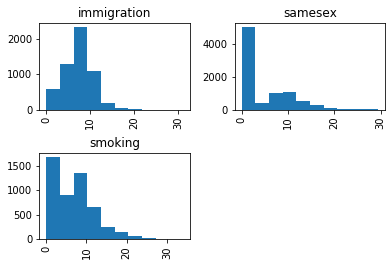

In [52]:
df['N frames'].hist(by=df['Issue'])
plt.show()